# Beyond Descriptive Statistics

In [6]:
import sqlite3 as sql
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt

In [7]:
conn = sql.connect('SportsStats.db')

In [8]:
def sql_to_df(query) :
    df = pd.read_sql(query,conn)
    return(df)

## AGE and HEIGHT

In [9]:
#AGE and HEIGHT
query = '''

SELECT 
 Age,
 Height
FROM 
 ( 
 SELECT
  *
 FROM 
  athlete_events_edited
 WHERE 
  (Age > 0 OR Height > 0)
 ) subtable
 
'''

corr1 = sql_to_df(query)
corr1

,Age,Height
0,24,180
1,23,170
2,24,0
3,34,0
4,21,185
...,...,...
262514,29,179
262515,27,176
262516,27,176
262517,30,185


In [11]:
#DON'T RUN THESE UNLESS YOU WANT TO CLOSE THE DATABASE
conn.close()

<Figure size 432x288 with 0 Axes>

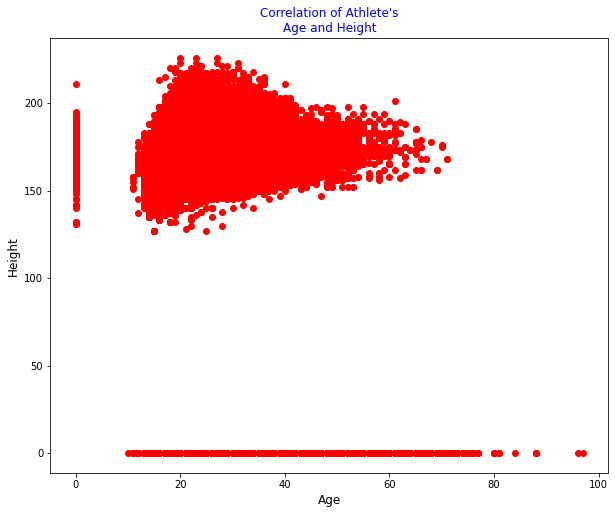

In [10]:
plt.clf()

plt.figure(figsize=(10,8))
plt.scatter(corr1['Age'], corr1['Height'], marker='o', color='red')
plt.title("Correlation of Athlete's\nAge and Height",color='blue')
plt.xlabel('Age',   fontsize = 12)
plt.ylabel('Height', fontsize = 12)

plt.show()

In [11]:
query = '''

SELECT 
 Age,
 MAX(Height) AS max_height,
 MIN(Height) AS min_height,
 (MAX(Height) - MIN(Height)) Gap
FROM 
 ( 
 SELECT
  *
 FROM 
  athlete_events_edited
 WHERE 
  Age > 0 AND Height > 0
 ) subtable
 GROUP BY 
  Age
'''
corr1b = sql_to_df(query)
corr1b

,Age,max_height,min_height,Gap
0,11,158,151,7
1,12,178,137,41
2,13,183,140,43
3,14,188,135,53
4,15,193,127,66
...,...,...,...,...
56,67,168,168,0
57,68,178,178,0
58,69,162,162,0
59,70,176,175,1


<Figure size 432x288 with 0 Axes>

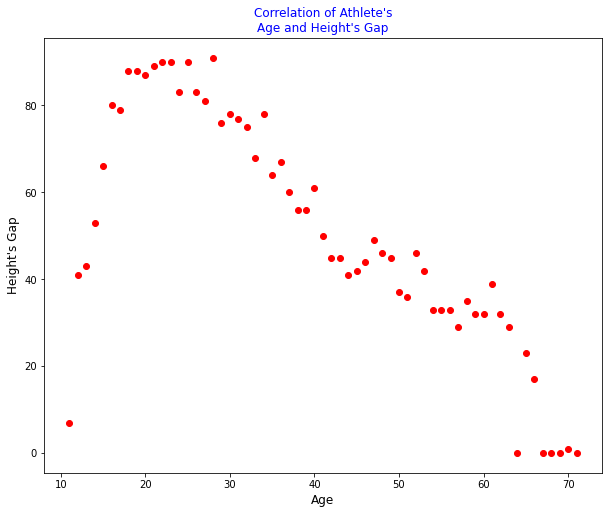

In [12]:
plt.clf()

plt.figure(figsize=(10,8))
plt.scatter(corr1b['Age'], corr1b['Gap'], marker='o', color='red')
plt.title("Correlation of Athlete's\nAge and Height's Gap",color='blue')
plt.xlabel('Age',   fontsize = 12)
plt.ylabel("Height's Gap", fontsize = 12)

plt.show()

In [13]:
query = '''

SELECT
  *
FROM 
  athlete_events_edited
WHERE 
  Age > 0 AND Height > 0
'''

corr1c = sql_to_df(query)
corr1c

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
3,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
4,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210063,Andrzej ya,M,29,179,89,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal
210064,Piotr ya,M,27,176,59,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal
210065,Piotr ya,M,27,176,59,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal
210066,Tomasz Ireneusz ya,M,30,185,96,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal


## AGE and WEIGHT

In [14]:
# AGE AND WEIGHT

query = '''

SELECT 
 Age,
 Weight
FROM 
 ( 
 SELECT
  *
 FROM 
  athlete_events_edited
 WHERE 
  (Age > 0 OR Height > 0)
 ) subtable
 
'''

corr2 = sql_to_df(query)
corr2

,Age,Weight
0,24,80
1,23,60
2,24,0
3,34,0
4,21,82
...,...,...
262514,29,89
262515,27,59
262516,27,59
262517,30,96


<Figure size 432x288 with 0 Axes>

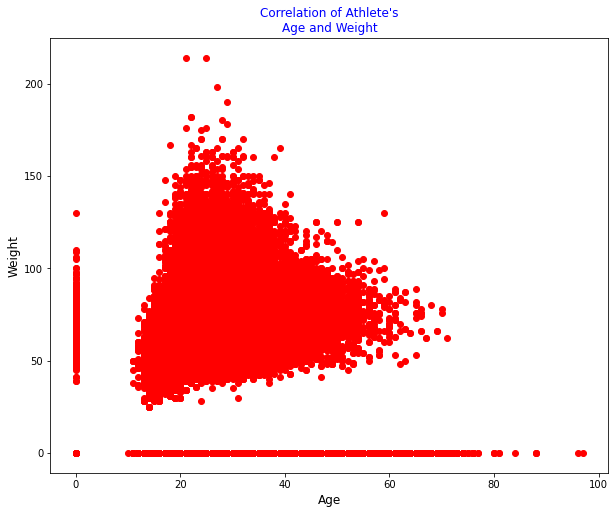

In [15]:
plt.clf()

plt.figure(figsize=(10,8))
plt.scatter(corr2['Age'], corr2['Weight'], marker='o', color='red')
plt.title("Correlation of Athlete's\nAge and Weight", color = 'blue')
plt.xlabel('Age',   fontsize = 12)
plt.ylabel('Weight', fontsize = 12)

plt.show()

In [16]:
query = '''

SELECT 
 Age,
 MAX(Weight) AS max_weight,
 MIN(Weight) AS min_weight,
 (MAX(Weight) - MIN(Weight)) Range
FROM 
 ( 
 SELECT
  *
 FROM 
  athlete_events_edited
 WHERE 
  Age > 0 AND Weight > 0
 ) subtable
 GROUP BY 
  Age
'''
corr2b = sql_to_df(query)
corr2b

,Age,max_weight,min_weight,Range
0,11,50,38,12
1,12,73,36,37
2,13,80,28,52
3,14,84,25,59
4,15,95,28,67
...,...,...,...,...
56,67,62,62,0
57,68,80,80,0
58,69,66,66,0
59,70,78,76,2


<Figure size 432x288 with 0 Axes>

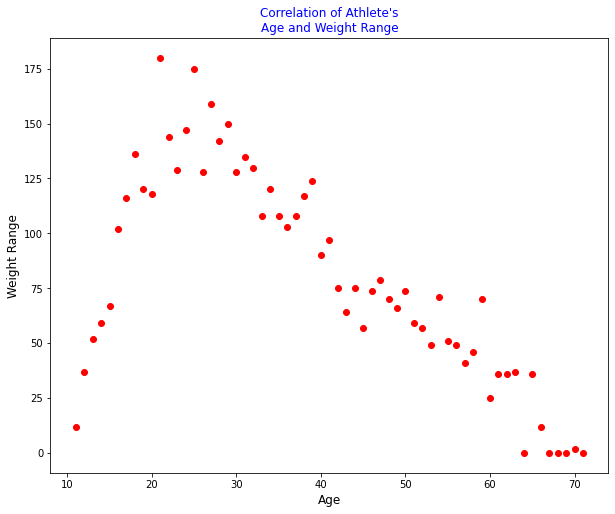

In [17]:
plt.clf()

plt.figure(figsize=(10,8))
plt.scatter(corr2b['Age'], corr2b['Range'], marker='o', color='red')
plt.title("Correlation of Athlete's\nAge and Weight Range",color='blue')
plt.xlabel('Age',   fontsize = 12)
plt.ylabel('Weight Range', fontsize = 12)

plt.show()

In [18]:
query = '''

SELECT 
 Age,
 AVG(Weight) weight_average
FROM 
 ( 
 SELECT
  *
 FROM 
  athlete_events_edited
 WHERE 
  Age > 0 AND Weight > 0
 ) subtable
 GROUP BY 
  Age
'''
corr2b = sql_to_df(query)
corr2b

,Age,weight_average
0,11,47.166667
1,12,52.482759
2,13,50.279503
3,14,50.656510
4,15,51.558745
...,...,...
56,67,62.000000
57,68,80.000000
58,69,66.000000
59,70,77.000000


<Figure size 432x288 with 0 Axes>

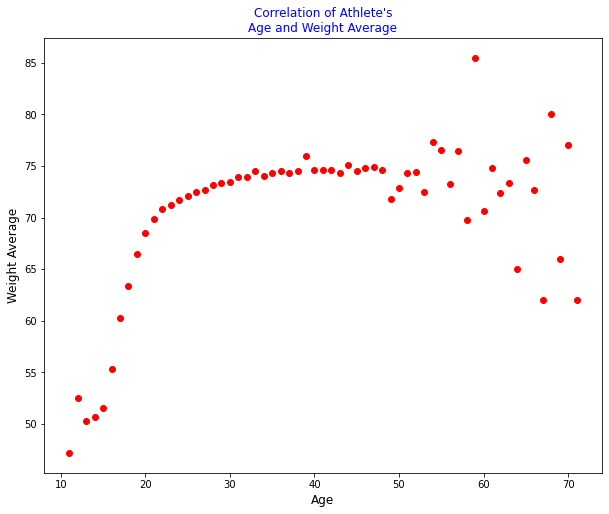

In [19]:
plt.clf()

plt.figure(figsize=(10,8))
plt.scatter(corr2b['Age'], corr2b['weight_average'], marker='o', color='red')
plt.title("Correlation of Athlete's\nAge and Weight Average",color='blue')
plt.xlabel('Age',   fontsize = 12)
plt.ylabel('Weight Average', fontsize = 12)

plt.show()

## Height and Weight

In [20]:
query = '''

SELECT 
 Weight,
 Height
FROM 
 ( 
 SELECT
  *
 FROM 
  athlete_events_edited
 WHERE 
  (Weight > 0 OR Height > 0)
 ) subtable
 
'''

corr3 = sql_to_df(query)
corr3

,Weight,Height
0,80,180
1,60,170
2,82,185
3,82,185
4,82,185
...,...,...
212328,89,179
212329,59,176
212330,59,176
212331,96,185


<Figure size 432x288 with 0 Axes>

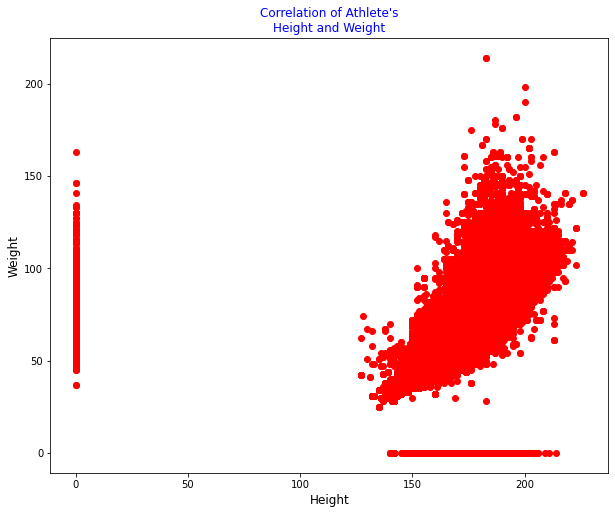

In [21]:
plt.clf()

plt.figure(figsize=(10,8))
plt.scatter(corr3['Height'], corr3['Weight'], marker='o', color='red')
plt.title("Correlation of Athlete's\nHeight and Weight", color = 'blue')
plt.xlabel('Height',   fontsize = 12)
plt.ylabel('Weight', fontsize = 12)

plt.show()

In [22]:
query = '''

SELECT 
 Weight,
 Height
FROM 
 ( 
 SELECT
  *
 FROM 
  athlete_events_edited
 WHERE 
  (Weight > 0 AND Height > 0)
 ) subtable
 
'''

corr3b = sql_to_df(query)
corr3b

,Weight,Height
0,80,180
1,60,170
2,82,185
3,82,185
4,82,185
...,...,...
206848,89,179
206849,59,176
206850,59,176
206851,96,185


<Figure size 432x288 with 0 Axes>

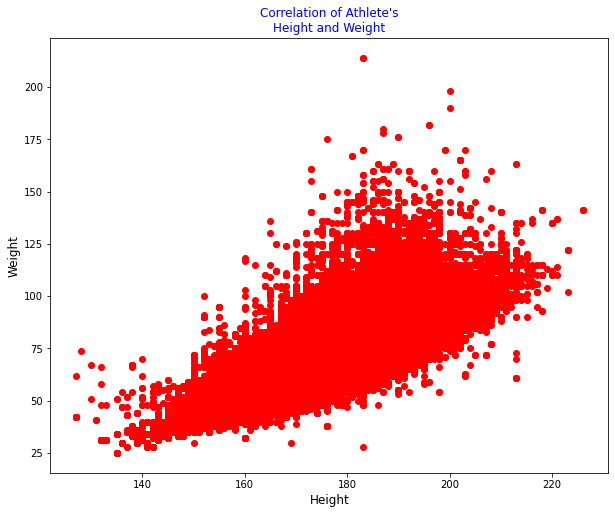

In [23]:
plt.clf()

plt.figure(figsize=(10,8))
plt.scatter(corr3b['Height'], corr3b['Weight'], marker='o', color='red')
plt.title("Correlation of Athlete's\nHeight and Weight", color = 'blue')
plt.xlabel('Height',   fontsize = 12)
plt.ylabel('Weight', fontsize = 12)

plt.show()

In [24]:
import seaborn as sns

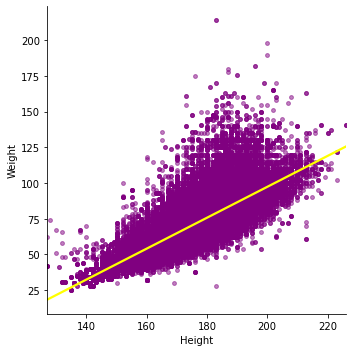

In [25]:
sns.lmplot('Height','Weight',data=corr3b,
           scatter_kws={'s':15,'color':'purple','alpha' : .5},
           line_kws={'color':'yellow'})